결측 -> 0으로

* 일기준 시계열분석
* 날짜를 datetime-> y,m,d 컬럼 추가


In [34]:
import pandas as pd
import seaborn as sns

rain=pd.read_csv('rain.csv',encoding='cp949', header=6)

In [2]:
rain.head()

,날짜,지점,강수량(mm)
0,1907-10-01,108,NaN
1,1907-10-02,108,0.2
2,1907-10-03,108,2.4
3,1907-10-04,108,NaN
4,1907-10-05,108,NaN


In [3]:
rain.shape

(42048, 3)

In [4]:
rain.isna().sum()

날짜             0
지점             0
강수량(mm)    24622
dtype: int64

In [5]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42048 entries, 0 to 42047
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       42048 non-null  object 
 1   지점       42048 non-null  int64  
 2   강수량(mm)  17426 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 985.6+ KB


In [6]:
rain=rain.rename(columns={rain.columns[2]:'강수량'})
rain.head()

,날짜,지점,강수량
0,1907-10-01,108,NaN
1,1907-10-02,108,0.2
2,1907-10-03,108,2.4
3,1907-10-04,108,NaN
4,1907-10-05,108,NaN


In [7]:
rain['강수량'] = rain['강수량'].fillna(0)

In [8]:
rain.head()

,날짜,지점,강수량
0,1907-10-01,108,0.0
1,1907-10-02,108,0.2
2,1907-10-03,108,2.4
3,1907-10-04,108,0.0
4,1907-10-05,108,0.0


In [9]:
rain.isna().sum()

날짜     0
지점     0
강수량    0
dtype: int64

In [10]:
rain['날짜']=pd.to_datetime(rain['날짜'])
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42048 entries, 0 to 42047
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      42048 non-null  datetime64[ns]
 1   지점      42048 non-null  int64         
 2   강수량     42048 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 985.6 KB


In [11]:
rain['year'] = rain['날짜'].dt.year
rain['month'] = rain['날짜'].dt.month
rain['day']= rain['날짜'].dt.day

In [12]:
rain.head()

,날짜,지점,강수량,year,month,day
0,1907-10-01,108,0.0,1907,10,1
1,1907-10-02,108,0.2,1907,10,2
2,1907-10-03,108,2.4,1907,10,3
3,1907-10-04,108,0.0,1907,10,4
4,1907-10-05,108,0.0,1907,10,5


In [13]:
rain_mean=rain.copy()

In [29]:
rain_mean.sort_values(['강수량'], ascending=False).head(10)

,날짜,지점,강수량,year,month,day
4689,1920-08-02,108,354.7,1920,8,2
32753,1998-08-08,108,332.8,1998,8,8
37489,2011-07-27,108,301.5,2011,7,27
28723,1987-07-27,108,294.6,1987,7,27
11971,1940-07-10,108,283.9,1940,7,10
33825,2001-07-15,108,273.4,2001,7,15
23268,1972-08-19,108,273.2,1972,8,19
27664,1984-09-01,108,268.2,1984,9,1
33112,1999-08-02,108,261.6,1999,8,2
37180,2010-09-21,108,259.5,2010,9,21


In [15]:
# 강수량 젤 많은날

rain_mean.query('강수량==354.7')

,날짜,지점,강수량,year,month,day
4689,1920-08-02,108,354.7,1920,8,2


In [25]:
rain_month_mean = rain_mean.groupby('month' , as_index=False)\
        .agg(month_mean=('강수량','mean'))\
        .sort_values('month')
rain_month_mean

,month,month_mean
0,1,0.700223
1,2,0.836811
2,3,1.464881
3,4,2.604348
4,5,2.939916
5,6,4.761768
6,7,12.235484
7,8,9.208942
8,9,4.825515
9,10,1.609093


<Axes: xlabel='month'>

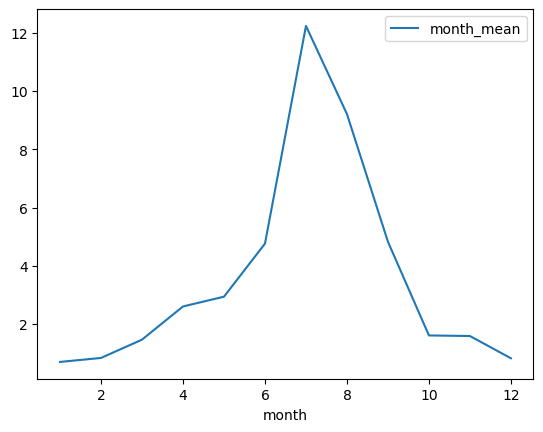

In [36]:
rain_month_mean.plot.line(x='month', y='month_mean')

In [18]:
rain_mean.groupby('year')\
        .agg(year_mean=('강수량','mean'))\
        .sort_values('year_mean')

,year_mean
year,
2024,0.994444
1907,1.376087
1951,1.558065
1949,1.708219
1939,1.749863
...,...
2011,5.587123
2010,5.598630
1940,5.860929


In [30]:
# 연도별 7월 평균강수량

jul_mean = rain.query('month==7')
jul_mean


,날짜,지점,강수량,year,month,day
274,1908-07-01,108,6.0,1908,7,1
275,1908-07-02,108,0.4,1908,7,2
276,1908-07-03,108,0.0,1908,7,3
277,1908-07-04,108,0.0,1908,7,4
278,1908-07-05,108,0.0,1908,7,5
...,...,...,...,...,...,...
41872,2023-07-27,108,0.0,2023,7,27
41873,2023-07-28,108,0.0,2023,7,28
41874,2023-07-29,108,0.0,2023,7,29
41875,2023-07-30,108,25.0,2023,7,30


In [32]:
jul_mean = jul_mean.groupby('year', as_index=False)\
                    .agg(rain_mean=('강수량','mean'))

jul_mean

,year,rain_mean
0,1908,17.106452
1,1909,5.161290
2,1910,12.187097
3,1911,8.896774
4,1912,12.629032
...,...,...
110,2019,6.270968
111,2020,8.722581
112,2021,5.429032
113,2022,8.138710


<Axes: xlabel='year'>

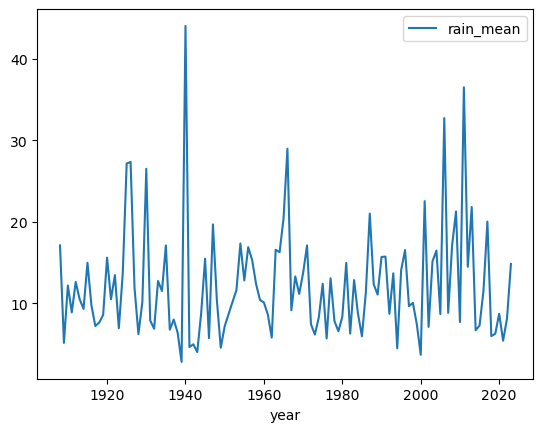

In [33]:
jul_mean.plot.line(x='year', y='rain_mean')